In [1]:
import pandas as pd

In [ ]:
df= {
    "Name": ["Moh", "Ali", "Sam", "Sali", "Sandra"],
    "Math" : [55, 65, 99, 85, 78],
    "Science": [66, 75, 58, 85, 66],
    "Geography": [75, 52, 66, 64, 80],
    "History": [47, 74, 63, 67, 80]
}

In [ ]:
df

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df

In [ ]:
df_melted = pd.melt(
                   df,
                   id_vars = ["Name"],
                   value_vars= ["Math", "Science", "Geography", "History"],
                   var_name= "Subject",
                   value_name = "Score")

In [ ]:
#df_melted

In [ ]:
import pandas as pd

In [ ]:
ls

In [2]:
df= pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', low_memory=False)

In [ ]:
df.head(2)

In [3]:
year_columns = [col for col in df.columns if col.startswith("Y")]
df_long= pd.melt(
                 df,
                 id_vars=["Area", "Item", "Element", "Unit"],
                 var_name= "Year",
                 value_vars = year_columns,
                 value_name = 'Value')
df_long["Year"] = df_long["Year"].str.extract(r'Y(\d{4})')[0].astype(int)
#df_long['Year'] = df_long['Year'].str.extract(r'Y(\d{4})')[0].astype(int)
df_long = df_long.dropna(subset= "Value")
df_long['Value'] = pd.to_numeric(df_long['Value'], errors = 'coerce')
df_long = df_long[df_long['Value'] != 0]

In [ ]:
df_long

In [ ]:
year_columns = [col for col in df.columns if col.startswith("Y")]
df_long= pd.melt(
                 df,
                 id_vars= ['Area', 'Item', 'Element', 'Unit'],
                 value_vars= year_columns,
                 value_name= 'Value', 
                 var_name = 'Year')
df_long['Year'] = df_long['Year'].str.extract(r'Y(\d{4})')[0].astype(int)
df_long = df_long[df_long['Value'] != 0]
df_long = df_long.dropna(subset = 'Value')
df_long['Value'] = pd.to_numeric(df_long["Value"], errors= 'coerce')

In [ ]:
df_long['Item'].unique()

In [ ]:
# List of crops you're interested in
crops = ['Wheat', 'Rice, paddy', 'Maize', 'Barley', 'Soybeans']

# Filter your long-format dataframe
selected_crops = df_long[df_long['Item'].isin(crops)]

In [ ]:
#selected_corps
# summarize production over time:
trends_crops= selected_corps.groupby(['Year', 'Item'])['Value'].sum().reset_index()

In [ ]:
# Plot Multi-Crop Trends:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.lineplot(data = trends_crops, x= 'Year', y= 'Value', hue= 'Item')
plt.title('Development of trends crops production over time')
plt.xlabel('Year')
plt.ylabel('Production (tones)')
plt.grid()
plt.get_backend()

In [ ]:
#compare crop growth rates (crop vs crop)
# which crops are growing fastest?
# which crops are declining:
trends_crops= trends_crops.sort_values(['Item', 'Year'])
# noe calculate the % change for each crop
trends_crops['growth_rate'] = trends_crops.groupby('Item')['Value'].pct_change() *100

In [ ]:
trends_crops

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=trends_crops, x = 'Year', y = 'growth_rate', hue= 'Item')

In [ ]:
df_long['Item'].unique()

In [4]:
selected_crops = ['Avocados', 'Apples', 'Bananas', 'Wheat']
df_selected= df_long[df_long['Item'].isin(selected_crops)]

In [ ]:
df_selected

In [5]:
# Aggregate Total Production per Year and Crop:
trends_crops = df_selected.groupby(['Year', 'Item'])['Value'].sum().reset_index()

In [ ]:
trends_crops

In [6]:
#calculate yearly growth rate (%):
trends_crops['growth_rate'] = trends_crops.groupby('Item')['Value'].pct_change() * 100

In [7]:
trends_crops_bananas = trends_crops[trends_crops['Item'] == 'Bananas']

In [8]:
trends_crops_bananas

,Year,Item,Value,growth_rate
2,1961,Bananas,1.220858e+08,NaN
6,1962,Bananas,1.282867e+08,5.079139
10,1963,Bananas,1.283746e+08,0.068486
14,1964,Bananas,1.375817e+08,7.172054
18,1965,Bananas,1.483569e+08,7.831864
...,...,...,...,...
234,2019,Bananas,5.796546e+08,0.024864
238,2020,Bananas,6.211452e+08,7.157820
242,2021,Bananas,6.516554e+08,4.911918
246,2022,Bananas,6.651047e+08,2.063874


In [9]:
#plot trend and growth rate:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='Value'>

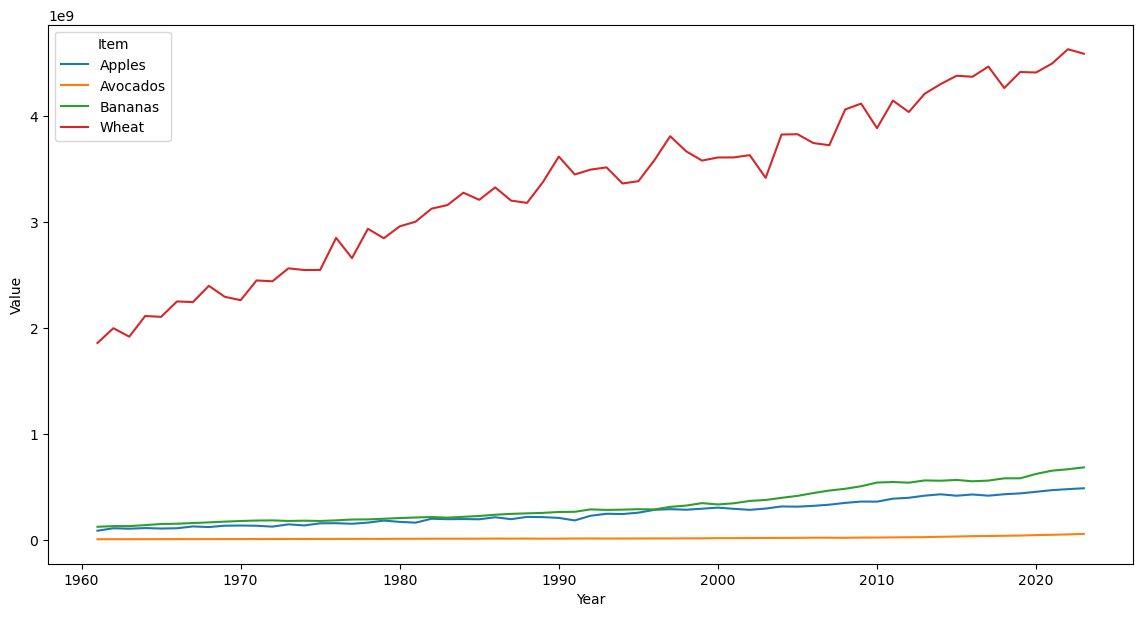

In [15]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=trends_crops, x= "Year", y= 'Value', hue = 'Item')

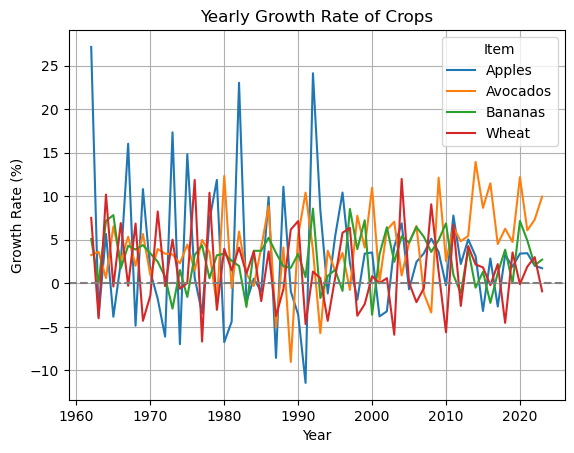

In [23]:
sns.lineplot(data = trends_crops, x= 'Year', y= 'growth_rate', hue = 'Item')
plt.title('Yearly Growth Rate of Crops')
plt.axhline(0, color= 'gray', linestyle= '--')
plt.ylabel('Growth Rate (%)')
plt.grid(True)

In [24]:
# export the trend data to excel:
trends_crops.to_excel('trends_crops.xlsx', index = False)

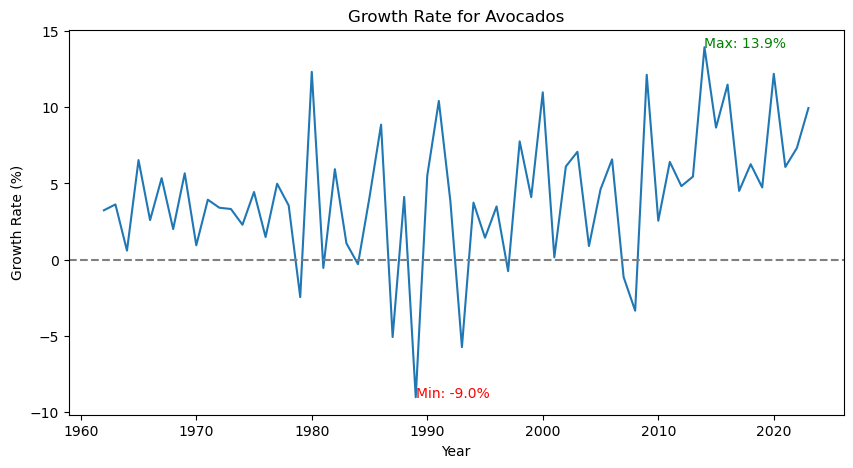

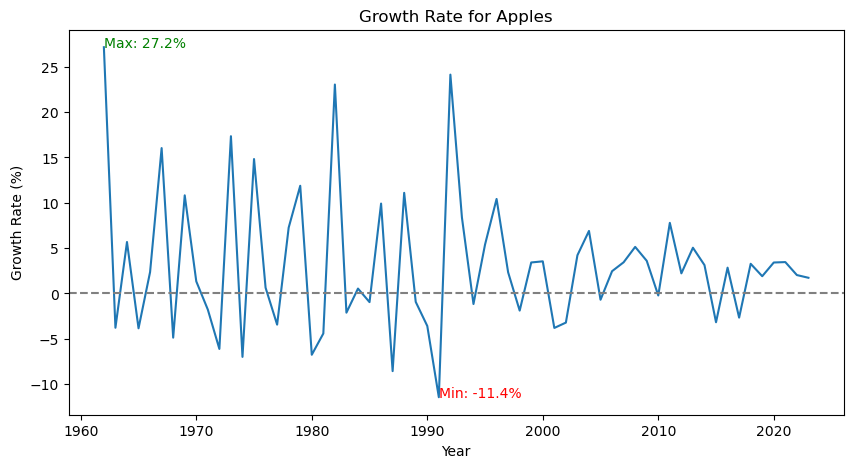

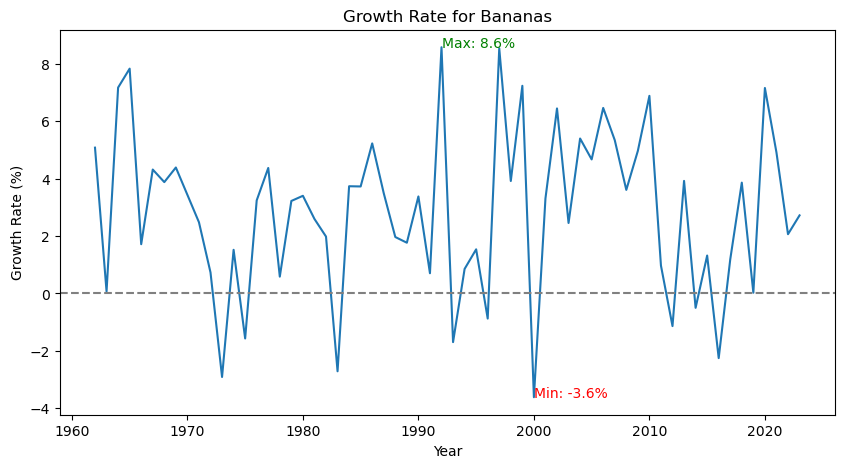

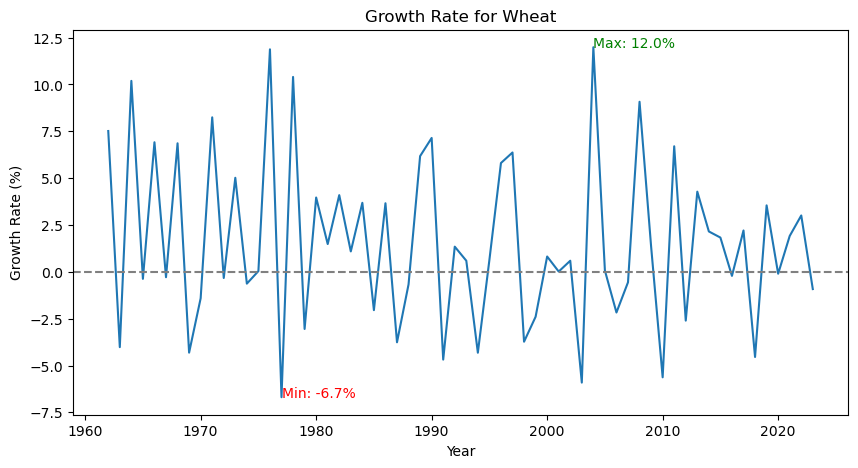

In [44]:
# highlight spikes and dips in growth rate:
for crop in selected_crops:
    crop_data = trends_crops[trends_crops['Item'] == crop]
    max_row = crop_data.loc[crop_data['growth_rate'].idxmax()]
    min_row = crop_data.loc[crop_data['growth_rate'].idxmin()]
    plt.figure(figsize=(10, 5))
    sns.lineplot(data = crop_data, x= 'Year', y='growth_rate')
    plt.axhline(0, color = 'gray', linestyle= '--')
    plt.title(f'Growth Rate for {crop}')
    plt.ylabel('Growth Rate (%)')
    plt.text(max_row['Year'], max_row['growth_rate'], f"Max: {max_row['growth_rate']:.1f}%", color = 'green')
    plt.text(min_row['Year'], min_row['growth_rate'], f"Min: {min_row['growth_rate']:.1f}%", color = 'red')
    


In [47]:
# apply rolling average to smooth trends:
trends_crops['smoothed'] = trends_crops.groupby('Item')['Value'].transform(lambda x:x.rolling(window=3, min_periods=1).mean())

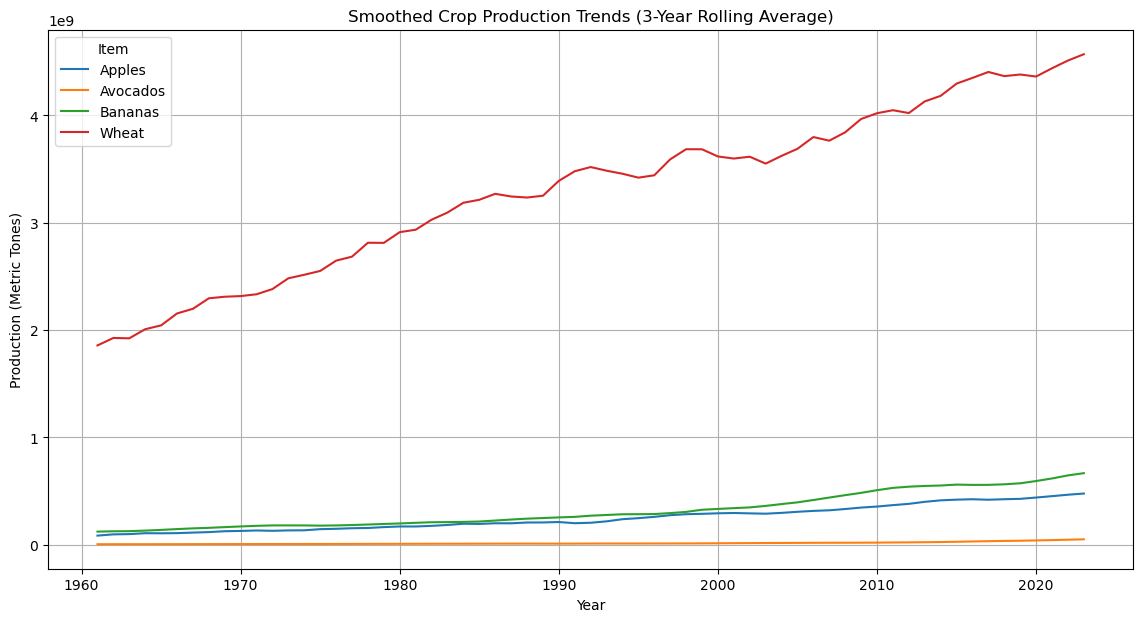

In [54]:
plt.figure(figsize=(14, 7))
sns.lineplot(data = trends_crops, x='Year', y='smoothed', hue= 'Item')
plt.title('Smoothed Crop Production Trends (3-Year Rolling Average)')
plt.ylabel('Production (Metric Tones)')
plt.grid(True)
plt.show()